# Marcelo Barro de Azevedo Vieira

## Trabalho da Disciplina de Algoritmos de Inteligência Artificial para classificação

### Link no Github: https://github.com/marcelobazevedo/algoritmo_classificacao

#### **1. Faça o módulo do Kaggle Intro to Machine Learning.**

![Descrição da Imagem](imagens/intro_machine_learning.png)

![Descrição da Imagem](imagens/Marcelo_Azevedo_Intro_to_Machine_Learning.png)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from IPython.display import display
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

In [81]:
## bibliotecas necessárias para a execução do código
!conda list > requirements.txt

In [19]:
path = "dataset/winequalityN.csv"
df = pd.read_csv(path)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


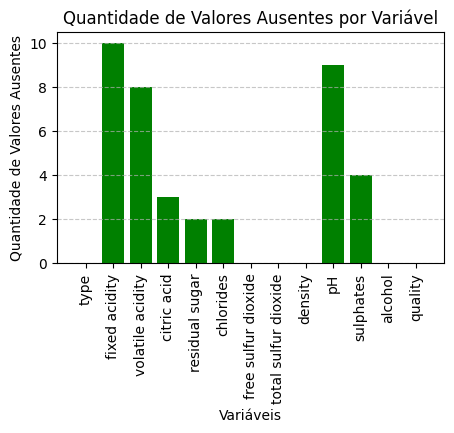

In [21]:
# Verificando dados ausentes
missing_values = df.isnull().sum()

# Criando o gráfico de barras para visualizar os dados ausentes
plt.figure(figsize=(5, 3))
plt.bar(missing_values.index, missing_values.values, color='green')
plt.xlabel("Variáveis")
plt.ylabel("Quantidade de Valores Ausentes")
plt.title("Quantidade de Valores Ausentes por Variável")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Tratando os valores ausentes com os valores anteriores da coluna
df.ffill(inplace=True)

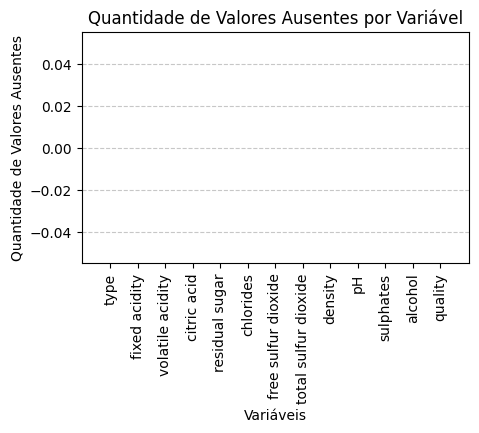

In [23]:
# Criando o gráfico de barras para visualizar os dados ausentes
missing = df.isnull().sum()
plt.figure(figsize=(5, 3))
plt.bar(missing.index, missing.values, color='red')
plt.xlabel("Variáveis")
plt.ylabel("Quantidade de Valores Ausentes")
plt.title("Quantidade de Valores Ausentes por Variável")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

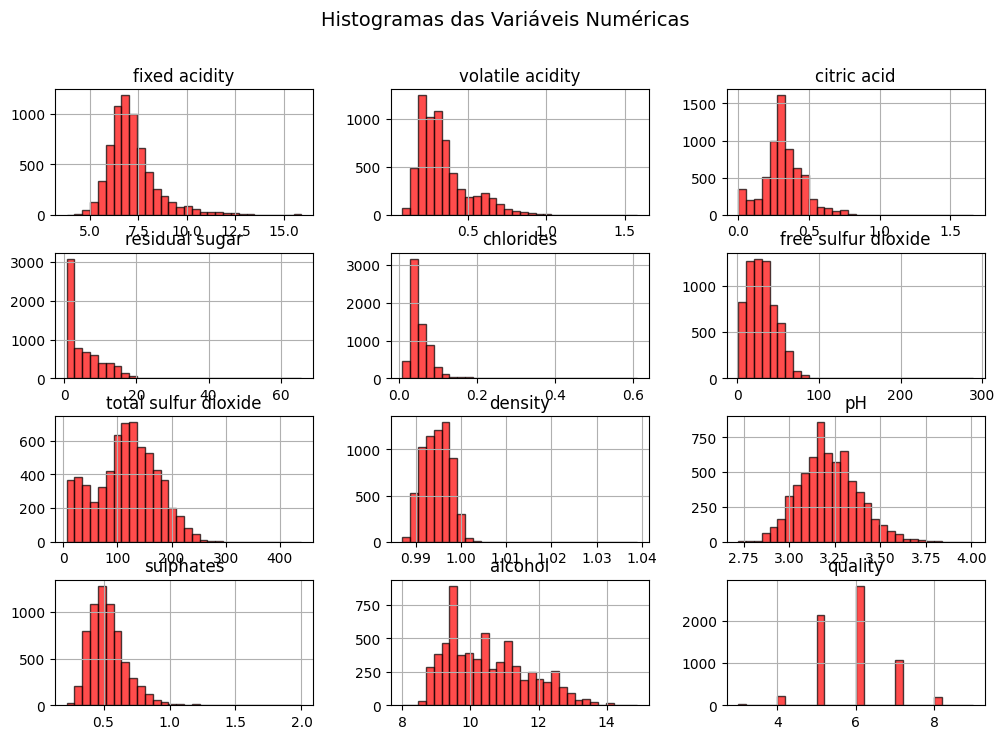

In [24]:
# Gerando os histogramas para todas as variáveis numéricas de forma a entender a distribuição dos dados
df.hist(figsize=(12, 8), bins=30, color='red', edgecolor='black', alpha=0.7)
plt.suptitle("Histogramas das Variáveis Numéricas", fontsize=14)
plt.show()

#### **2. Resposta para a questão 2**

##### 2.1 Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5, caso contrário o valor será 1.

In [25]:
# Criando um dataframe independente já filtrando os vinhos brancos
df_ww = df[df['type'] == 'white'].copy()
# Criando a variável categórica e definindo os valores 0 ou 1
df_ww['opinion'] = df_ww['quality'].apply(lambda x: 0 if x <= 5 else 1)
# Fazendo drop da variável quality
df_ww.drop(columns=['quality'], inplace=True)
# Exibindoo as primeira linhas do novo dataset
print(df_ww.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  opinion  
0       0.45      8.8        1  
1       0.49      9.5        1  
2       0.4

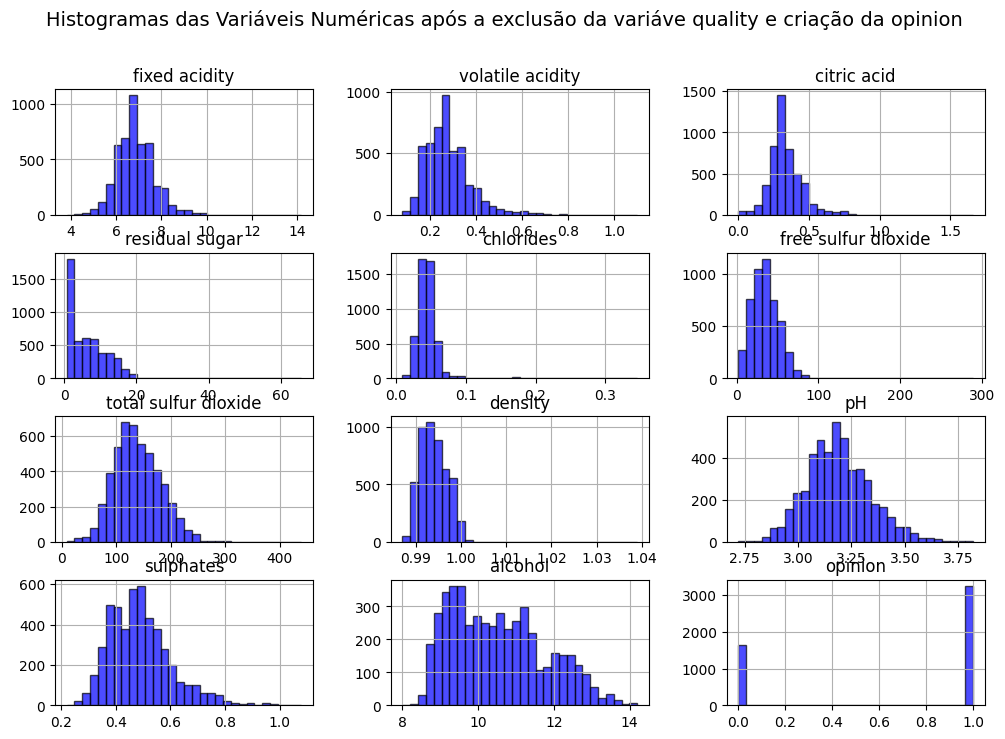

In [26]:
df_ww.hist(figsize=(12, 8), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.suptitle("Histogramas das Variáveis Numéricas após a exclusão da variáve quality e criação da opinion", fontsize=14)
plt.show()

#### **3. Resposta da Questão 3.**

##### 3.1 Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)?

### **Variáveis do Dataset**
| Variável               | Tipo       | Descrição |
|------------------------|-----------|-----------|
| **type**              | Categórica | Tipo do vinho (**"white"** para vinho branco ou **"red"** para vinho tinto). |
| **fixed acidity**     | Contínua   | Acidez fixa do vinho, medida em g/dm³. Representa os ácidos não voláteis, como o ácido tartárico. |
| **volatile acidity**  | Contínua   | Acidez volátil, medida em g/dm³. Refere-se aos ácidos que evaporam facilmente, como o ácido acético. Altos valores podem indicar sabor avinagrado. |
| **citric acid**       | Contínua   | Quantidade de ácido cítrico no vinho, medida em g/dm³. Ajuda a dar frescor ao vinho. |
| **residual sugar**    | Contínua   | Açúcar residual do vinho, medido em g/dm³. Refere-se ao açúcar que sobra após a fermentação. Vinhos secos geralmente têm menos de 4 g/dm³. |
| **chlorides**        | Contínua   | Teor de cloretos (sal), medido em g/dm³. Influencia o sabor salgado do vinho. |
| **free sulfur dioxide**  | Contínua   | Dióxido de enxofre livre, medido em mg/dm³. Ajuda a prevenir a oxidação e crescimento de microrganismos. |
| **total sulfur dioxide** | Contínua   | Dióxido de enxofre total, medido em mg/dm³. Inclui o SO₂ livre e o SO₂ ligado. Regulado por normas para evitar excesso. |
| **density**          | Contínua   | Densidade do vinho, em g/cm³. Relacionada ao teor alcoólico e teor de açúcar. |
| **pH**              | Contínua   | Medida da acidez geral do vinho. Um pH baixo indica maior acidez, enquanto um pH alto indica menor acidez. A maioria dos vinhos varia entre **3 e 4**. |
| **sulphates**        | Contínua   | Sulfatos, medidos em g/dm³. Influenciam a estabilidade microbiológica do vinho. |
| **alcohol**         | Contínua   | Teor alcoólico do vinho, expresso em % (porcentagem de álcool por volume). |
| **opinion**         | Categórica | Nova variável criada a partir da **quality**. Assume: **0** se qualidade ≤ 5 e **1** se qualidade > 5. |


##### 3.2 Quais são as médias e desvios padrões ?

In [27]:
# Calculando as médias e os desvios padrões para cada variável
values = df_ww.describe().loc[['mean', 'std']]
print(values)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
mean       6.855033          0.278312     0.334204        6.391343   0.045773   
std        0.843450          0.100841     0.121020        5.072120   0.021847   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
mean            35.308085            138.360657  0.994027  3.188269   
std             17.007137             42.498065  0.002991  0.150937   

      sulphates    alcohol   opinion  
mean   0.489835  10.514267  0.665169  
std    0.114141   1.230621  0.471979  


#### **4. Respostas para a questão 4.**

##### 4.a Descreva as estapas necessárias para criar um modelo de classificação eficiente.

### **Etapas para Criar um Modelo de Classificação**
| Etapa                          | Definição |
|--------------------------------|-----------|
| **1. Coleta e Entendimento dos Dados** | Explorar os dados para entender suas características, variáveis, tipos e distribuições. Identificar possíveis problemas, como dados ausentes e outliers. |
| **2. Pré-processamento dos Dados** | Limpeza dos dados, tratamento de valores ausentes, remoção ou substituição de outliers e normalização/ padronização das variáveis. |
| **3. Criação da Variável-Alvo** | No nosso caso, a variável **"opinion"** foi criada a partir de "quality", transformando o problema em classificação binária. |
| **4. Análise Exploratória dos Dados (EDA)** | Criar histogramas, gráficos de dispersão, boxplots e matrizes de correlação para entender relações entre as variáveis e a variável-alvo. |
| **5. Divisão dos Dados em Treino e Teste** | Separar os dados em **conjunto de treino (80%)** e **conjunto de teste (20%)** para avaliar o desempenho do modelo. |
| **6. Escolha do Algoritmo** | Escolher um modelo adequado para classificação, como **Regressão Logística, Random Forest, SVM, KNN ou Redes Neurais**. Testar diferentes algoritmos para encontrar o melhor. |
| **7. Treinamento do Modelo** | Ajustar o modelo aos dados de treino e testar diferentes hiperparâmetros para otimização. |
| **8. Avaliação do Modelo** | Avaliar a performance do modelo nos dados de teste usando métricas como **Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão**. |
| **9. Otimização do Modelo** | Ajustar hiperparâmetros, balancear classes (caso necessário) e aplicar técnicas como **feature selection** para melhorar a precisão do modelo. |
| **10. Implementação e Monitoramento** | Se o modelo atingir um bom desempenho, ele pode ser implementado para prever novas amostras. O monitoramento contínuo é necessário para garantir sua eficácia ao longo do tempo. |


##### 4.b Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

In [59]:
# Tratando valores ausentes preenchendo com a média das colunas numéricas
df_ww.fillna(df.mean(numeric_only=True), inplace=True)
# Selecionando as features e a variável alvo
X = df_ww.drop(columns=['opinion', 'type'])
y = df_ww['opinion']

In [60]:
# Normalizando as variáveis para melhorar a convergência do modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# Configurando a validação cruzada estratificada com k=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [62]:
# Definindo função para calcular métricas de validação cruzada
def avaliar_modelo(modelo, X, y):
    scores = {
        'accuracy': cross_val_score(modelo, X, y, cv=kfold, scoring='accuracy', n_jobs=-1),
        'precision': cross_val_score(modelo, X, y, cv=kfold, scoring='precision', n_jobs=-1),
        'recall': cross_val_score(modelo, X, y, cv=kfold, scoring='recall', n_jobs=-1),
        'f1_score': cross_val_score(modelo, X, y, cv=kfold, scoring='f1', n_jobs=-1)
    }
    
    resultados = {
        'Média Acurácia': np.mean(scores['accuracy']),
        'Desvio Acurácia': np.std(scores['accuracy']),
        'Média Precisão': np.mean(scores['precision']),
        'Desvio Precisão': np.std(scores['precision']),
        'Média Recall': np.mean(scores['recall']),
        'Desvio Recall': np.std(scores['recall']),
        'Média F1-Score': np.mean(scores['f1_score']),
        'Desvio F1-Score': np.std(scores['f1_score'])
    }
    
    return pd.DataFrame([resultados])

In [63]:
# Treinando e avaliando Regressão Logística
modelo_rl = LogisticRegression(max_iter=5000, solver='saga')
resultados_rl = avaliar_modelo(modelo_rl, X_scaled, y)

# Treinando e avaliando Árvore de Decisão
modelo_dt = DecisionTreeClassifier(random_state=42)
resultados_dt = avaliar_modelo(modelo_dt, X, y)  

# Treinando e avaliando SVM
modelo_svm = SVC(kernel='linear', random_state=42)
resultados_svm = avaliar_modelo(modelo_svm, X_scaled, y)

In [64]:
print("Questão 4.b - Resultados da Regressão Logística:")
display(resultados_rl)

print("Questão 4.c - Resultados da Árvore de Decisão:")
display(resultados_dt)

print("Questão 4.d - Resultados da SVM:")
display(resultados_svm)

Questão 4.b - Resultados da Regressão Logística:


,Média Acurácia,Desvio Acurácia,Média Precisão,Desvio Precisão,Média Recall,Desvio Recall,Média F1-Score,Desvio F1-Score
0,0.748874,0.015734,0.774561,0.015213,0.878753,0.018209,0.823174,0.010585


Questão 4.c - Resultados da Árvore de Decisão:


,Média Acurácia,Desvio Acurácia,Média Precisão,Desvio Precisão,Média Recall,Desvio Recall,Média F1-Score,Desvio F1-Score
0,0.795021,0.014994,0.846172,0.011828,0.845914,0.025754,0.845762,0.013035


Questão 4.d - Resultados da SVM:


,Média Acurácia,Desvio Acurácia,Média Precisão,Desvio Precisão,Média Recall,Desvio Recall,Média F1-Score,Desvio F1-Score
0,0.752548,0.014146,0.772727,0.011673,0.890108,0.021559,0.827082,0.010598


#### **5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.**

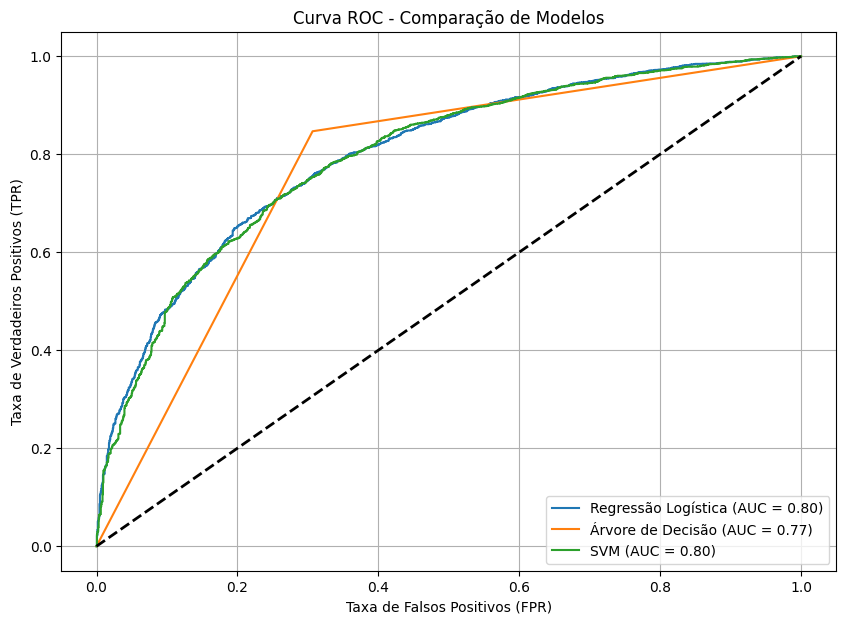

In [65]:
# Criando dicionário para armazenar as curvas ROC
modelos = {
    "Regressão Logística": modelo_rl,
    "Árvore de Decisão": modelo_dt,
    "SVM": modelo_svm
}

plt.figure(figsize=(10, 7))

# Gerando a curva ROC para cada modelo
for nome, modelo in modelos.items():
    if nome == "SVM":
        y_scores = cross_val_predict(modelo, X_scaled, y, cv=kfold, method="decision_function")
    else:
        y_scores = cross_val_predict(modelo, X_scaled, y, cv=kfold, method="predict_proba")[:, 1]

    # Calculando FPR, TPR e AUC
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)
    # Plotando a curva ROC
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

# Adicionando linha diagonal de referência
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configurações do gráfico
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend(loc="lower right")
plt.grid()

plt.show()


#### Justificativa da Questão 5.

A **curva ROC** mede o desempenho do modelo em termos da taxa de verdadeiros positivos (**TPR**) contra a taxa de falsos positivos (**FPR**) para diferentes limiares de decisão. O **AUC (Área Sob a Curva)** quantifica a capacidade do modelo de distinguir entre classes.

**Escolha do Melhor Modelo**

O modelo com **a maior área sob a curva (AUC)** é o que apresenta **melhor desempenho** para a tarefa de classificação.

- Se um modelo tem um **AUC maior**, significa que ele é melhor em separar as classes.
- Se as curvas de dois modelos forem próximas, a escolha pode depender de outros fatores como interpretabilidade e tempo de treinamento.

**Conclusão**
- Se a **Regressão Logística ou SVM** tiverem **AUC maior**, um deles deve ser escolhido, pois são mais estáveis para classificação.
- Se a **Árvore de Decisão** apresentar desempenho similar, pode ser escolhida se houver necessidade de interpretabilidade.

Inferência nos Vinhos Tintos:


,Total de Vinhos,Vinhos Bons (quality > 5),Vinhos Ruins (quality <= 5)
0,1599,1010,589


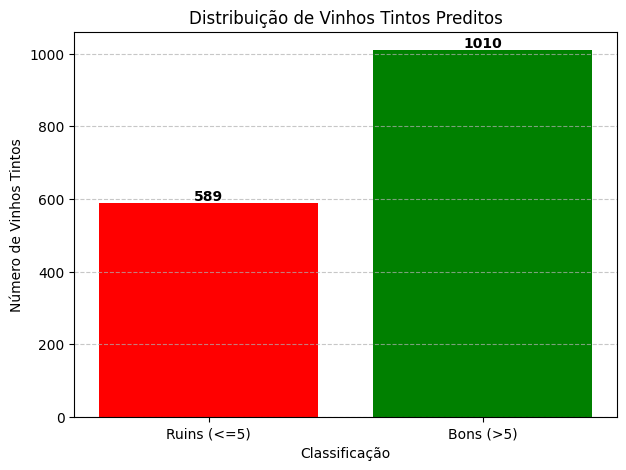

In [82]:
# Filtrando apenas os dados de vinho tinto da base original
df_wr = pd.read_csv(path)
df_wr = df_wr[df_wr['type'] == 'red'].copy()

# Removendo a coluna 'type' e garantindo que apenas colunas numéricas sejam usadas
df_wr = df_wr.drop(columns=['type'], errors='ignore')

# Criando a variável 'opinion' com base na coluna 'quality'
df_wr['opinion'] = df_wr['quality'].apply(lambda x: 0 if x <= 5 else 1)

# Tratando valores ausentes preenchendo com a média das colunas numéricas
imputer = SimpleImputer(strategy='mean')
X_wr_imputed = imputer.fit_transform(df_wr.drop(columns=['opinion', 'quality'], errors='ignore'))

# Separando os atributos de entrada (X) e a variável alvo (y)
X_wr = pd.DataFrame(X_wr_imputed, columns=df_wr.drop(columns=['opinion', 'quality'], errors='ignore').columns)
y_wr = df_wr['opinion']

# Normalizando os dados do vinho tinto com o mesmo scaler usado para os brancos
scaler = StandardScaler()
X_wr_scaled = scaler.fit_transform(X_wr)

# Escolhendo o melhor modelo (com base no gráfico ROC)
melhor_modelo = LogisticRegression(random_state=42)

# Garantindo que o modelo foi treinado apenas nos vinhos brancos antes da inferência
X_scaled = scaler.fit_transform(imputer.fit_transform(df[df['type'] == 'white'].drop(columns=['quality', 'type'])))
y = df[df['type'] == 'white']['quality'].apply(lambda x: 0 if x <= 5 else 1)
melhor_modelo.fit(X_scaled, y)  # Treinado *somente* com os vinhos brancos

# Realizando inferência nos vinhos tintos (sem re-treinamento)
y_pred_wr = melhor_modelo.predict(X_wr_scaled)

# Contando quantos vinhos tintos foram classificados como bons (1) ou ruins (0)
resultados_wr = pd.DataFrame({
    'Total de Vinhos': [len(y_pred_wr)],
    'Vinhos Bons (quality > 5)': [np.sum(y_pred_wr)],
    'Vinhos Ruins (quality <= 5)': [len(y_pred_wr) - np.sum(y_pred_wr)]
})

# Exibindo resultados
print("Inferência nos Vinhos Tintos:")
display(resultados_wr)

# Criando gráfico de barras para visualizar os resultados
plt.figure(figsize=(7, 5))
ax = plt.bar(['Ruins (<=5)', 'Bons (>5)'], [resultados_wr['Vinhos Ruins (quality <= 5)'][0], resultados_wr['Vinhos Bons (quality > 5)'][0]], color=['red', 'green'])

# Adicionando os valores nas barras
for p in ax:
    plt.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Configurando o gráfico
plt.xlabel('Classificação')
plt.ylabel('Número de Vinhos Tintos')
plt.title('Distribuição de Vinhos Tintos Preditos')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibindo o gráfico
plt.show()

#### **6. Resposta da questão 6.**

##### **Ele funciona da mesma forma para essa nova base?**
Não.
##### **Justifique.**
O modelo pode não generalizar bem, porque foi treinado **apenas com vinhos brancos** e pode não capturar corretamente as características dos vinhos tintos.

**Motivos para não usar o mesmo modelo diretamente**

1. **Diferenças nas características dos vinhos:**
	- Vinhos tintos e brancos têm **composições químicas diferentes** (pH, acidez, açúcar, álcool, etc.).
	- O modelo treinado só com vinhos brancos pode ter aprendido **padrões específicos** desses vinhos, que não se aplicam aos tintos.

2. **Risco de viés e baixa acurácia:**
	- Como os dados de vinho tinto não foram usados no treinamento, o modelo pode errar mais na previsão dos vinhos tintos.
	- Se a distribuição dos atributos for muito diferente, o modelo pode estar "fora da sua zona de conforto".

3. **O modelo pode não generalizar bem:**
	- Modelos de machine learning funcionam melhor quando o treinamento reflete bem os dados de inferência.
	- O ideal seria treinar um modelo com dados de ambos os vinhos para melhorar a generalização.

**O que fazer então?**
Treinar um novo modelo combinando vinhos brancos e tintos no treinamento. Desta forma, o modelo aprende características de ambos os tipos de vinho. A previsão será mais precisa e confiável para os vinhos tintos.

#### **7. Disponibilize os códigos usados para responder da questão 2-6 em uma conta github e indique o link para o repositório.**

##### https://github.com/marcelobazevedo/algoritmo_classificacao